<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]
single_image.shape

(28, 28)

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

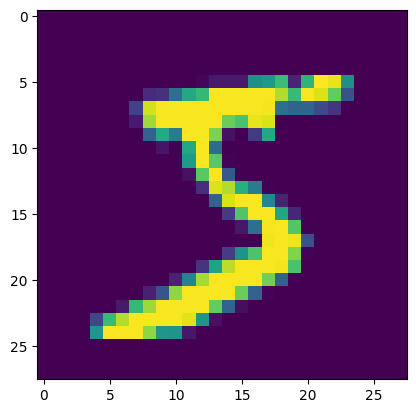

In [9]:
plt.imshow(single_image)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# One hot incoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
y_example[0] # == 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,num_classes=10) # num_classes is optional

In [21]:
y_cat_train = to_categorical(y_train, 10)

# Scaling

In [22]:
single_image.max()

255

In [23]:
single_image.min()

0

In [24]:
x_train = x_train/255
x_test = x_test/255

In [25]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
scaled_image.max()

1.0

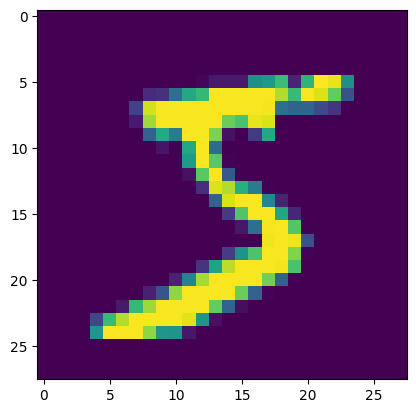

In [27]:
plt.imshow(scaled_image)

# Reshape the data

In [28]:
x_train.shape

(60000, 28, 28)

In [30]:
# batch_size, width, height, color_channels - we adding the last one (black&white image)
x_train = x_train.reshape(60000,28,28,1)

In [31]:
x_test = x_test.reshape(10000,28,28,1)

# Building a model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# output layer softmax while multi class
model.add(Dense(10,activation='softmax'))

# keras.io/metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

# Training

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [36]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1412 - accuracy: 0.9574 - val_loss: 0.0569 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0452 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0359 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0395 - val_accuracy: 0.9874


# Validation

In [37]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

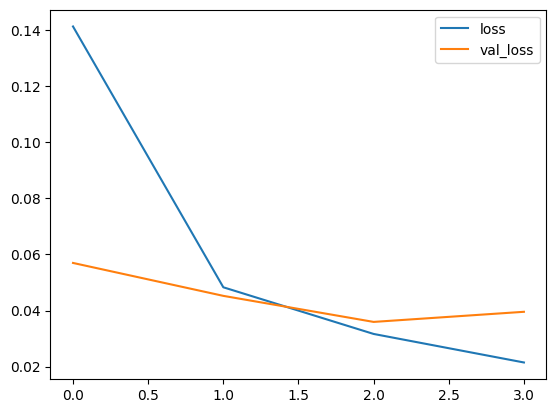

In [38]:
metrics[['loss','val_loss']].plot()

<Axes: >

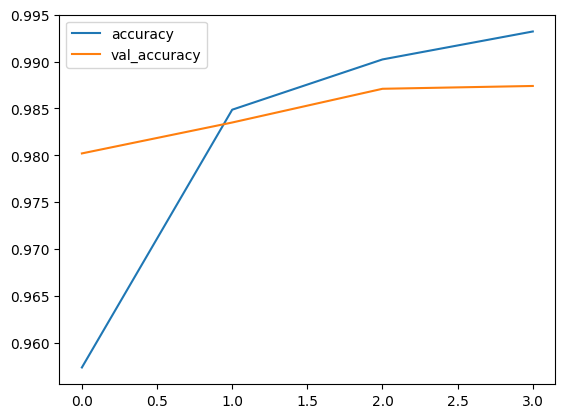

In [39]:
metrics[['accuracy','val_accuracy']].plot()

In [40]:
# to get available metrics
model.metrics_names

['loss', 'accuracy']

In [41]:
# to get values for those metrics after training
model.evaluate(x_test,y_cat_test,verbose=0)

[0.03954576700925827, 0.9873999953269958]

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
preds_prob = model.predict(x_test)
predictions = np.argmax(preds_prob, axis=1)

313/313 [==============================] - 2s 6ms/step


In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    1,    1,    0,    0,    3,    0,    0,    0],
       [   0, 1129,    1,    2,    0,    0,    2,    0,    1,    0],
       [   2,    2, 1015,    4,    1,    0,    3,    2,    3,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  969,    0,    2,    0,    1,   10],
       [   2,    0,    0,   11,    0,  873,    3,    0,    2,    1],
       [   3,    2,    0,    1,    1,    1,  949,    0,    1,    0],
       [   0,    2,    7,    3,    1,    0,    0, 1013,    1,    1],
       [   2,    0,    0,    4,    0,    1,    0,    1,  964,    2],
       [   2,    2,    0,    6,    5,    3,    0,    6,    4,  981]])

In [50]:
import seaborn as sns

<Axes: >

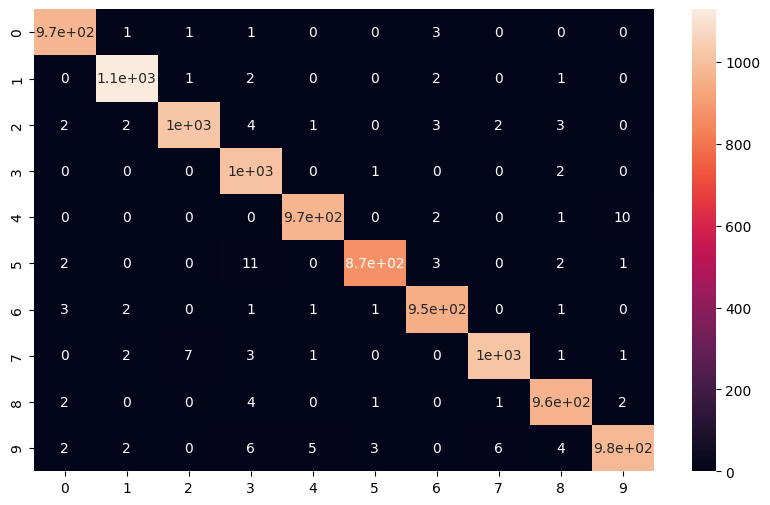

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predict single image

In [53]:
my_number = x_test[33]

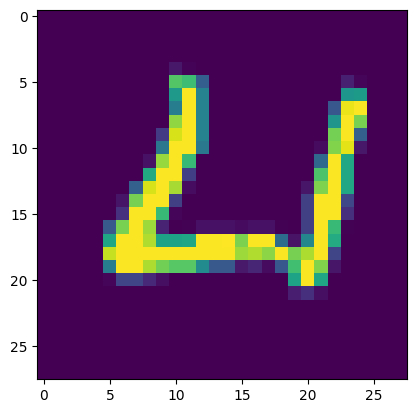

In [54]:
plt.imshow(my_number.reshape(28,28))

In [57]:
# reshape: number of images, width, heght, color channels
# model.predict_classes(my_number.reshape(1,28,28,1)) # Does not work anymore
preds_prob = model.predict(my_number.reshape(1,28,28,1)) # This will output probabilities
predictions = np.argmax(preds_prob, axis=1) # Converts the probabilities to the particular class. Use this for multi-class classification.
predictions

1/1 [==============================] - 0s 33ms/step


array([4])